<span style="color:black;font-size: 30px; font-family: Arial; font-weight: bold;">EDUNET FOUNDATION-Classroom Exercise Notebook</span>

<span style="color:black;font-size: 30px; font-family: Arial; font-weight: bold;"> Lab 9- Air Quality Index Analysis Using Python </span>

### OpenWeatherMap

OpenWeatherMap is a popular platform that provides weather data, including current weather, forecasts, and historical data, to the public via various APIs. It offers a wide range of services that are useful for individuals, businesses, and developers who need reliable weather information. Key services are given below:
- Current Weather Data
- Weather Forecasts
- Historical Weather Data
- Air Pollution Data


Here's a step-by-step guide on how to create an account on OpenWeatherMap and obtain your API key:

- Go to OpenWeatherMap.
- Click on the "Sign Up" button on the top right corner of the page.
- Fill in your details (email, password, etc.) and create your account.
- Once your account is created, log in to your account.
- After logging in, go to the API keys section.
- Click on the "Generate" button to create a new API key.
- Copy the generated API key.

### Step 1: Import Necessary Libraries

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### Step 2: Fetch AQI Data

In [5]:
API_KEY = '5d925acc34a017c26bd1e162aa8634ee'
CITY = 'Chennai'  # You can replace this with any city you are interested in

In [6]:
def fetch_aqi_data(api_key, city, start, end):
    # Get latitude and longitude for the city
    geo_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}'
    geo_response = requests.get(geo_url)
    geo_data = geo_response.json()
    if len(geo_data) == 0:
        raise ValueError(f"City {city} not found")
    
    lat = geo_data[0]['lat']
    lon = geo_data[0]['lon']
    
    url = f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}'
    response = requests.get(url)
    data = response.json()
    return data

# Define the start and end timestamps for historical data (example: last 7 days)
end_time = int(datetime.datetime.now().timestamp())
start_time = end_time - (7 * 24 * 60 * 60)  # 7 days ago

# Fetch AQI data
aqi_data = fetch_aqi_data(API_KEY, CITY, start_time, end_time)

In [12]:
aqi_data

{'coord': {'lon': 80.2702, 'lat': 13.0837},
 'list': [{'main': {'aqi': 4},
   'components': {'co': 473.98,
    'no': 1.05,
    'no2': 9.94,
    'o3': 144.48,
    'so2': 21.7,
    'pm2_5': 69.97,
    'pm10': 93.22,
    'nh3': 2.44},
   'dt': 1734159600},
  {'main': {'aqi': 4},
   'components': {'co': 467.3,
    'no': 1.01,
    'no2': 9.68,
    'o3': 141.62,
    'so2': 20.5,
    'pm2_5': 67.73,
    'pm10': 90.7,
    'nh3': 2.12},
   'dt': 1734163200},
  {'main': {'aqi': 4},
   'components': {'co': 447.27,
    'no': 0.98,
    'no2': 9.94,
    'o3': 133.04,
    'so2': 19.31,
    'pm2_5': 63.56,
    'pm10': 86.26,
    'nh3': 1.71},
   'dt': 1734166800},
  {'main': {'aqi': 4},
   'components': {'co': 433.92,
    'no': 0.91,
    'no2': 12.17,
    'o3': 121.59,
    'so2': 20.5,
    'pm2_5': 60.51,
    'pm10': 83.41,
    'nh3': 1.87},
   'dt': 1734170400},
  {'main': {'aqi': 4},
   'components': {'co': 460.62,
    'no': 0.57,
    'no2': 15.77,
    'o3': 113.01,
    'so2': 21.46,
    'pm2_5': 60

### Step 3: Process and Analyze the Data

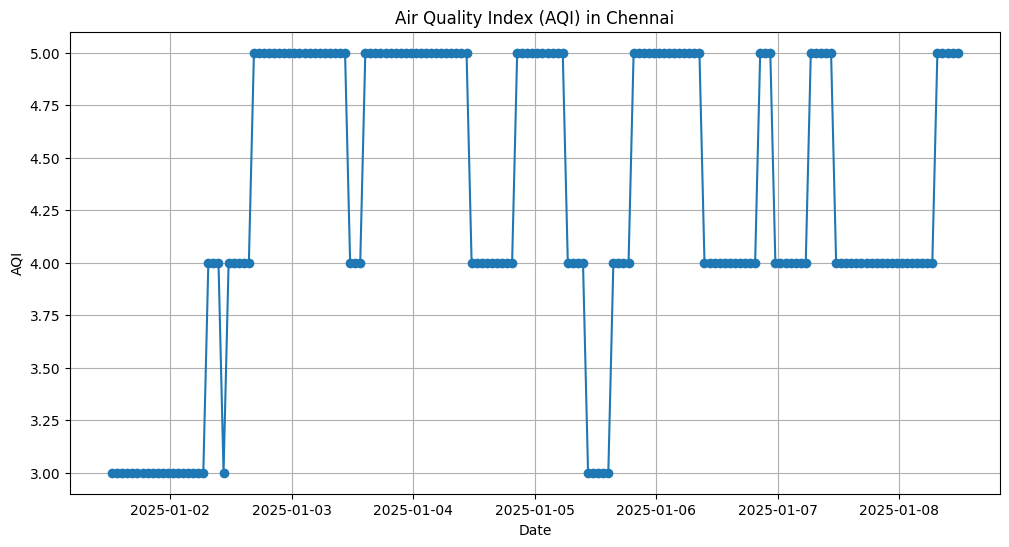

In [7]:
# Extract relevant data
def process_aqi_data(data):
    records = []
    for item in data['list']:
        dt = datetime.datetime.fromtimestamp(item['dt'])
        aqi = item['main']['aqi']
        components = item['components']
        record = {
            'datetime': dt,
            'aqi': aqi,
            **components
        }
        records.append(record)
    return pd.DataFrame(records)

aqi_df = process_aqi_data(aqi_data)

# Plot AQI over time
plt.figure(figsize=(12, 6))
plt.plot(aqi_df['datetime'], aqi_df['aqi'], marker='o', linestyle='-')
plt.title(f'Air Quality Index (AQI) in {CITY}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

### Step 4: Visualize the Data

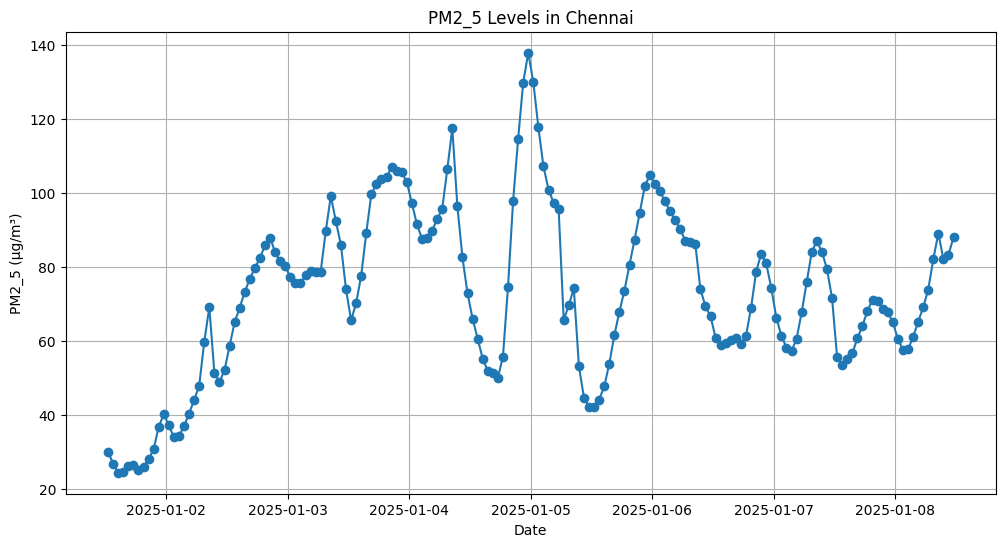

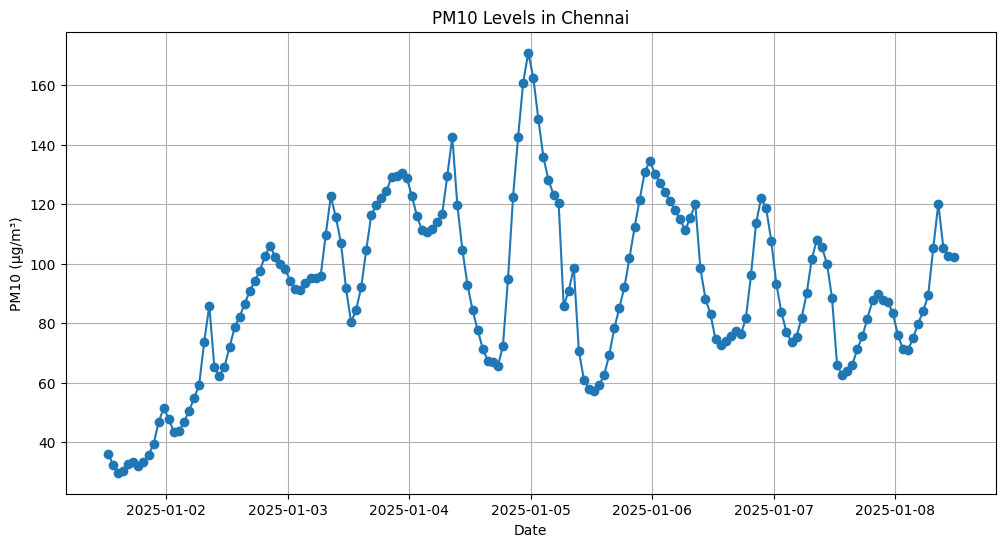

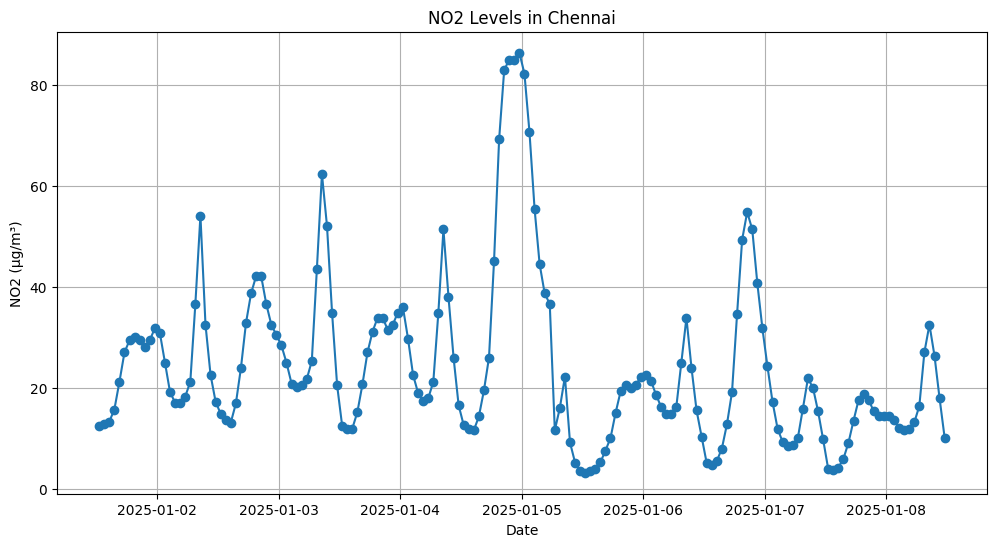

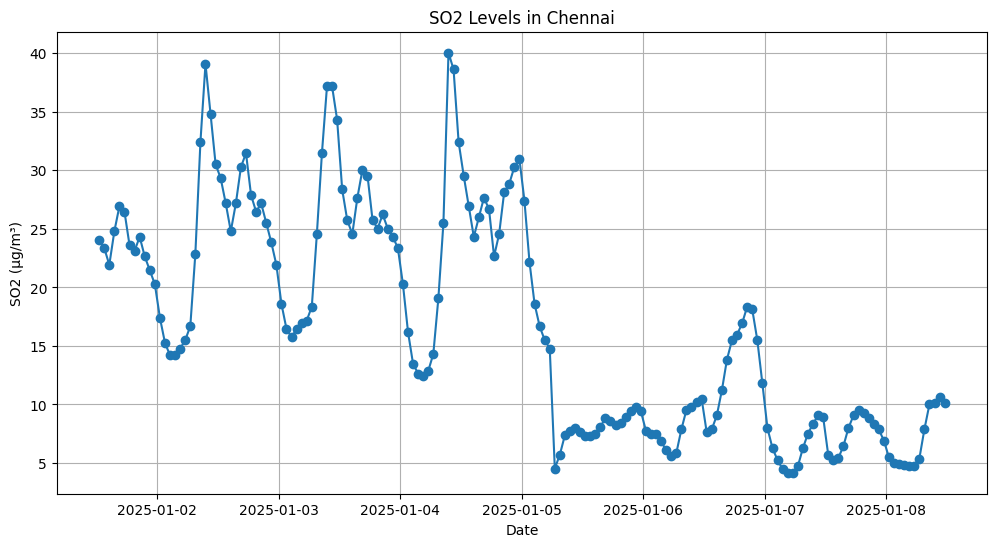

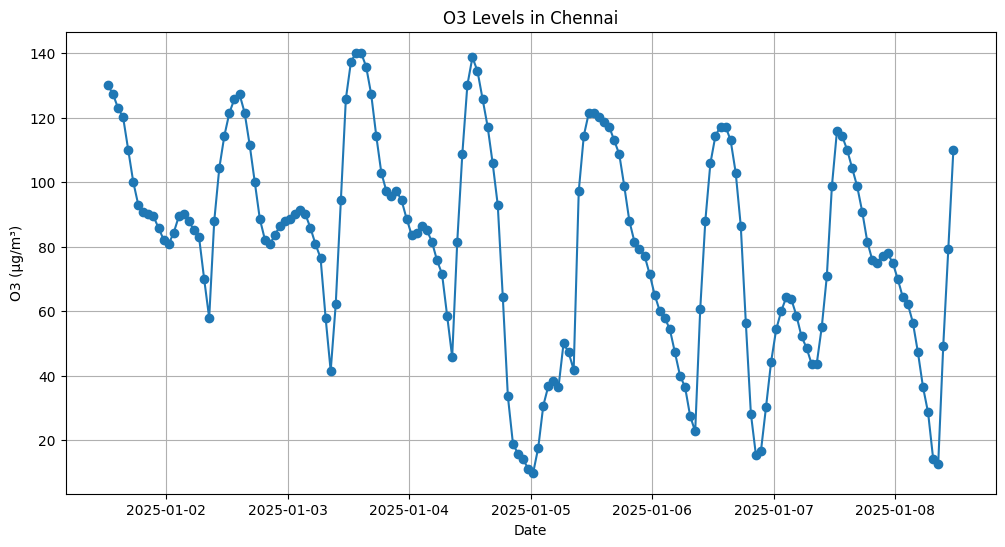

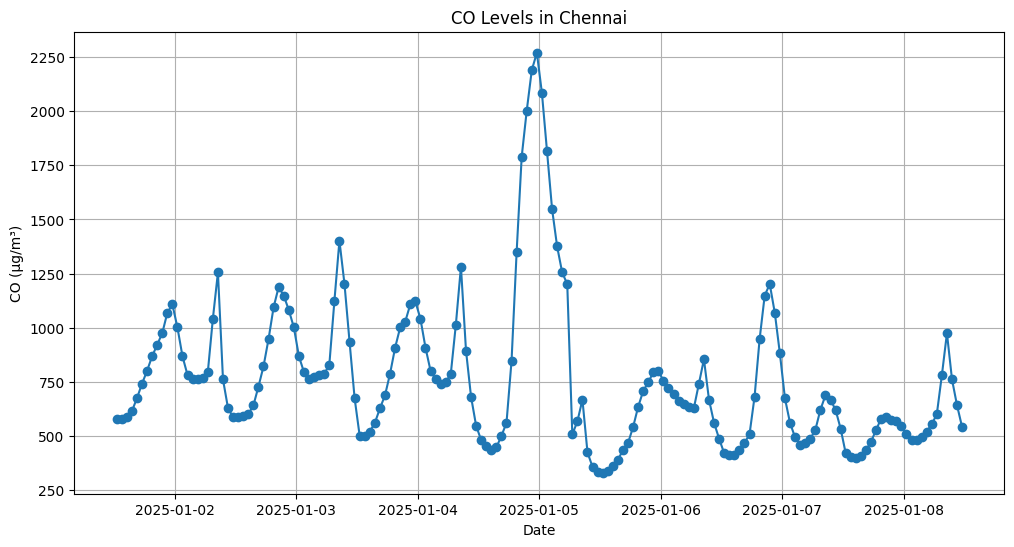

In [8]:
# Plot individual components
components = ['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'co']
for component in components:
    plt.figure(figsize=(12, 6))
    plt.plot(aqi_df['datetime'], aqi_df[component], marker='o', linestyle='-')
    plt.title(f'{component.upper()} Levels in {CITY}')
    plt.xlabel('Date')
    plt.ylabel(f'{component.upper()} (µg/m³)')
    plt.grid(True)
    plt.show()

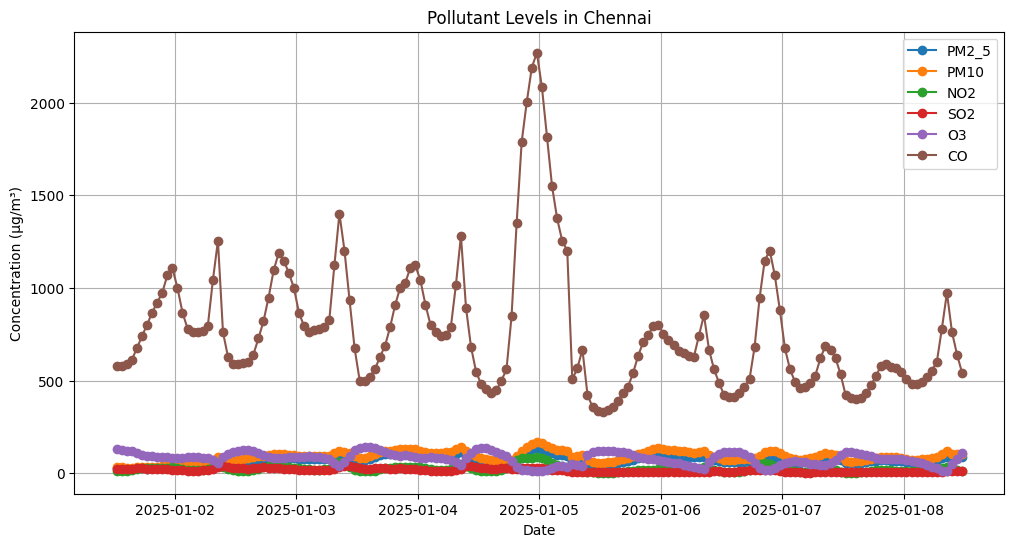

In [9]:
# Plotting multiple components in a single plot for comparison
plt.figure(figsize=(12, 6))
for component in components:
    plt.plot(aqi_df['datetime'], aqi_df[component], marker='o', linestyle='-', label=component.upper())
plt.title(f'Pollutant Levels in {CITY}')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

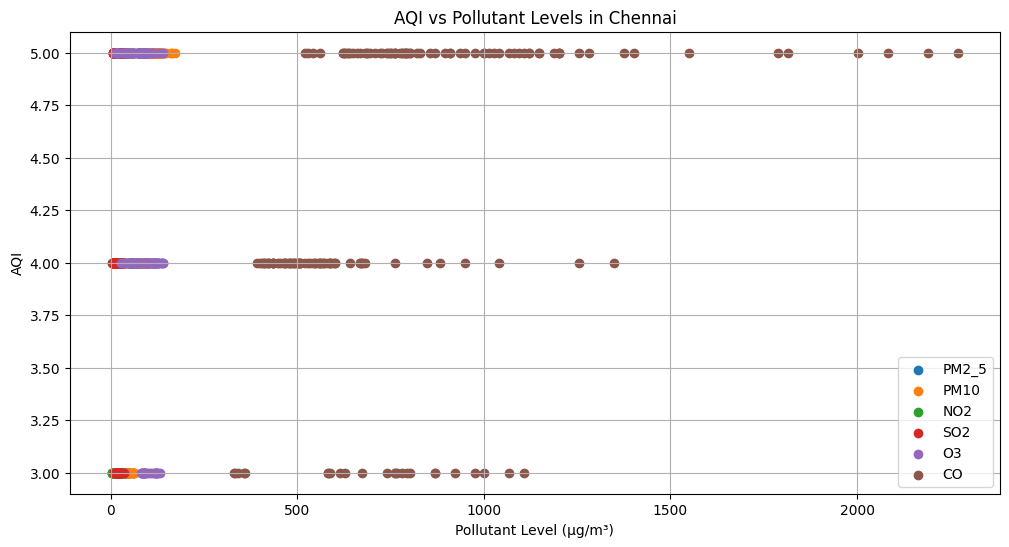

In [10]:
# Scatter plot for AQI vs individual components
plt.figure(figsize=(12, 6))
for component in components:
    plt.scatter(aqi_df[component], aqi_df['aqi'], label=component.upper())
plt.title(f'AQI vs Pollutant Levels in {CITY}')
plt.xlabel('Pollutant Level (µg/m³)')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()